In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, pandas as pd
import os.path, os, sys, json, shutil
from pathlib import Path
import math
import scipy
from math import sqrt, log, pi, exp, sinh
from scipy.optimize import curve_fit, leastsq
import matplotlib.gridspec as gridspec
from scipy.signal import argrelextrema
from scipy.interpolate import UnivariateSpline
from scipy.signal import lfilter
from scipy.signal import savgol_filter
import os.path
from os import path

plt.rcParams.update({'font.size': 16, 'figure.figsize': [8.0, 8.0]})

## Plot simulation S(q)

/home/marpoli/Work/2_TLL/Many-body/Coralie_data/series2-closed-h0.61-e0.05-C0.34-dp0
[Errno 2] No such file or directory: 'series2-closed-h0.61-e0.05-C0.34-dp0'
File missing in: series2-closed-h0.61-e0.05-C6.06-dp2


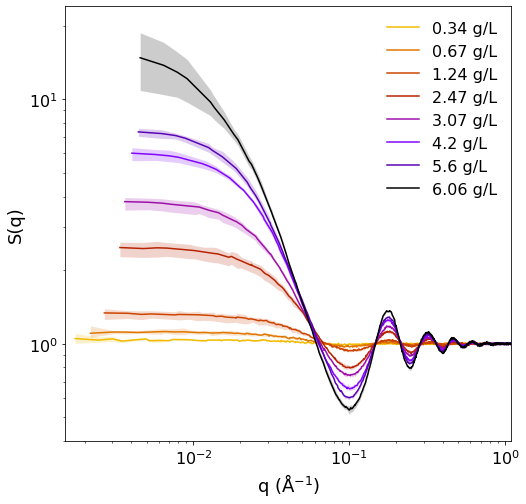

In [8]:
#Working directory
try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd -q $workdir

%cd $workdir/

serie = "series2"
conf = "closed"
epslj = 0.05
epshh = 0.61

for C in [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06]:
    if C == 0.34:
        col = '#f2bb00'
    elif C == 0.67:
        col = '#e07600'
    elif C == 1.24:
        col = '#cc4400'
    elif C == 2.47:
        col = '#b72300'
    elif C == 3.07:
        col = '#9e0ea9'
    elif C == 4.2:
        col = '#8104ff'
    elif C == 5.6:
        col = '#5a01b5'
    elif C == 6.06:
        col='black'

    nriter = 0
    smoy = [0] * 600
    qmoy = [0] * 600
    smax = [0] * 600
    smin = [1000] * 600
    for dp in [0,1,2]:
        pfx = str(serie)+"-"+str(conf)+"-h"+str(epshh)+"-e"+str(epslj)+"-C"+str(C)+"-dp"+str(dp)
        %cd -q $pfx
        if path.exists("debye_n2.dat"):
            q,s = np.loadtxt("debye_n2.dat", unpack=True)
            nriter = nriter + 1   
            for i in np.arange(0,len(q),1):
                qmoy[i] = q[i]
                smoy[i] = smoy[i] + s[i]
                if smax[i] < s[i]:
                    smax[i] = s[i]
                if smin[i] > s[i]:
                    smin[i] = s[i]                    
        else:
            print("File missing in:", pfx)    # Say if there is a missing file (the averaging will be performed without it)
        %cd -q '..' 
 
    for i in np.arange(0,len(q),1):
        smoy[i] = smoy[i]/nriter

    plt.plot(qmoy,smoy,color=col,label=str(C)+" g/L")
    plt.fill_between(qmoy,smin,smax,interpolate=True, color=col, alpha=0.2, lw=0)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.4,24)
    plt.xlim(0.0015,1.1)
    plt.xlabel("q ("r'${\rm{\AA}^{-1}}$'")", fontsize=18)
    plt.ylabel("S(q)", fontsize=18)
    plt.legend(frameon=False, loc=1)
    np.savetxt(str(serie)+"-"+str(conf)+"-h"+str(epshh)+"-e"+str(epslj)+"-C"+str(C)+'_moy.dat',np.transpose((qmoy,smoy)))  # For later (B2)
    

## Calculate I(q) from simulation and plot it with experimental I(q)

In [9]:
#Working directory
try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd -q $workdir

%cd $workdir/

plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 8.0]})

serie = "series2"
conf = "closed"
epslj = 0.05
epshh = 0.61

qmon, imon = np.loadtxt("formf_s2_closed.dat", usecols=(0,1), unpack=True)

for C in [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06]:
    if C == 0.34:
        col = '#f2bb00'
        eq, ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02928_H2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 0.67:
        col = '#e07600'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02925_G2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 1.24:
        col = '#cc4400'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02923_F2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 2.47:
        col = '#b72300'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02916_E2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 3.07:
        col = '#9e0ea9'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02914_D2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 4.2:
        col = '#8104ff'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02911_C2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 5.6:
        col = '#5a01b5'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02909_B2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 6.06:
        col='black'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02906_A2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)

    qy,sy = np.loadtxt(str(serie)+"-"+str(conf)+"-h"+str(epshh)+"-e"+str(epslj)+"-C"+str(C)+'_moy.dat',unpack=True)
    formf = np.interp(qy,qmon,imon)
    plt.plot(qy,sy*formf,color=col,label=str(C)+" g/L")
    plt.plot(eq,ei/C,color=col,ls='--')
    plt.xscale('log')
    plt.yscale('log')
    #plt.ylim(1e-4,1e-1)
    #plt.xlim(1e-3,6e-1)
    plt.xlabel("q ("r'${\rm{\AA}^{-1}}$'")", fontsize=18)
    plt.ylabel("I(q)/C", fontsize=18)
    plt.legend(frameon=False, loc=1)

/home/marpoli/Work/2_TLL/Many-body/Coralie_data/series2-closed-h0.61-e0.05-C0.34-dp0


OSError: formf_s2_closed.dat not found.